# Lab 1: Introduction to Histogramming in ROOT

![alt-text](https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/cb84199695714c1de5cd8da959bd04417e83a3a0/20-Figure23-1.png "")


## Table of Contents
1. **[TTrees](#ttrees)**  
   1.1. [Introduction to the TTree Data Structure](#intro-ttrees)  
   1.2. [Loading a TTree](#load-ttree)   
2. **[Sample Histograms](#sample-histograms)**
3. **[Creating a Histogram](#creating-histogram)**  
   3.1. [Exercise](#create-hist-exercise)  
4. **[Filling Histograms](#filling-histograms)**  
   4.1. [Fill Method](#fill-method)  
   4.2. [Random Method](#random-method)  
   4.3. [Exercise](#fill-hist-exercise)  
5. **[Displaying Histograms](#display-histograms)**  
   5.1. [TCanvas](#tcanvas)  
   5.2. [Draw()](#draw)  
   5.3. [Exercise](#draw-exercise)   

## 1. TTrees <a name="ttrees" />

### 1.1 Introduction to the TTree Data Structure <a name="intro-ttrees" />
A `TTree` is a data structure that is used to store a large amount of data in a structured, organized fashion. With this structure also comes to ability to compress the data at a very high ratio, allowing for terabytes of data to be compressed to only gigabytes of data. 

The `TTree` data structure can best be understood by a physical tree. Within each `TTree` there exist branches of data, each a class called `TBranch`. To optimize I/O (Input/Output), a single branch can be read at a time. This makes sense, as you can imagine a single `TTree` can be GBs of compressed data with multiple branches. Instead of loading the entire `TTree`, we can load a single branch in a fraction of the time. Each `TBranch` also has its own buffer, [an object used to write data to a file/disk](#https://en.wikipedia.org/wiki/Data_buffer), meaning that each branch of data can be written to a separate file if wanted or necessary.

Within each `TBranch` will be many `TLeaf`'s. These are the objects that actually represent the data that is being stored in the `TTree`. This can be arrays, integers, floats, histograms, distributions, images, movies, almost anything. 

One thing that you should be wary of, is when inspecting leaves within a `TBrowser`, the `TBrowser` will automatically create a histogram out of the leaves if the `TBrowser` can. So if the leaf is just an array of values, you will see a histogram. If the leaf is just a single integer, you will also see a histogram with a single entry where the value is. And if the leaf is a histogram...you will see a histogram. 

Another thing to note, is a lot of output files generated in ROOT share the same ".root" file extension. This means a ".root" file could be a `TTree`, `TH1` (a histogram), or a multitude of other files (or even a directory of files!). ROOT does this on purpose to allow for easy compression of the files, but it can become confusing if you are not sure what you are looking at. The best course of action if you are not sure what this ".root" file is or even contains is to:

**1)** Open your terminal and type "root" to start the interactive ROOT environment  
**2)** Type `new TBrowser();` and then press enter  
**3)** And open your ".root" file. This will show you what the ".root" file contains.  

Clearly we can see the power that lies in a `TTree` data structure. We are just scratching the surface of everything that a `TTree` is capable of doing. The big picture to remember is a `TTree` offers an organized way to represent very large collections of large datasets and through this organization is able to realize patterns within the data to compress the data very efficiently.

### 1.2 Loading a TTree <a name="load-ttree" />

In order to work with ROOT files, they must be read first.

In [1]:
// TFile::Open("path") takes a string as the input. Make sure to give it the complete path to the file, 
// not just it's filename.
TFile * root_file = TFile::Open("../../Datasets/TTbar/ee_ttbarsignalplustau.root");

// Now the ROOT file is stored as a TFile pointer under the variable root_file
// Once the file is opened, you can grab any tree in the ROOT file with the Get("TreeName") function. 
// Get() returns a TObject pointer, so we need to cast it to our specific object type (in this case, a TTree)
TTree * tree = (TTree *) root_file->Get("ttBar_treeVariables_step8;4");

## 2. Sample Histograms <a name="sample-histograms" />
This is an example of what we can achieve with histogramming within ROOT. There is much more you can learn about histograms within ROOT that we will not cover. This sample code will be broken down and explained throughout this lab.

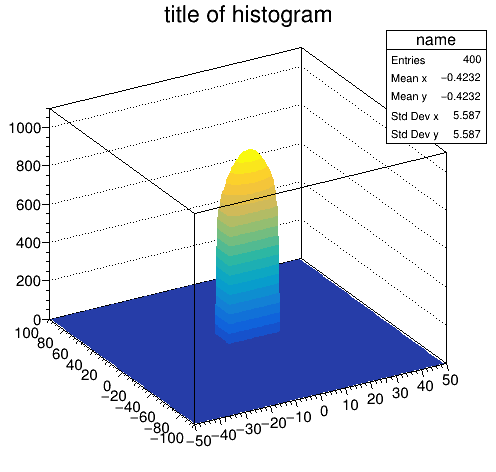

Info in <TCanvas::Print>: png file two_histogram_surf.png has been created


In [1]:
// 1D Histogram
TH1F * oneDimHist = new TH1F("1d", "Histogram from a Gaussian", 100, -3, 3);
oneDimHist->FillRandom("gaus", 10000);

// 2D Histogram
int number_of_bins_x = 100;
int number_of_bins_y = 100;
TH2S * twoDimHistogram = new TH2S("name", "title of histogram", number_of_bins_x, -50, 50, number_of_bins_y, -100, 100);
for(int x = -10; x < 10; ++x) {
    for(int y = -10; y < 10; ++y) {
        twoDimHistogram->Fill(x, y, -pow(x, 2) - pow(y, 2) + 500);
    }
}
        
// 3D Histogram
TH3F * threeDimHistogram = new TH3F("h3", "h3 title", 80, 0.0, 1.0, 100, -2.0, 2.0,
                       50, 0.0, 3.0);
// create the TCanvas to paint onto
TCanvas * canvas = new TCanvas("canvas_name", "canvas_name", 500, 500);

// plot the 2D histogram as a 3D surface
twoDimHistogram->Draw("SURF2");
canvas->SaveAs("two_histogram_surf.png");
canvas->Draw();

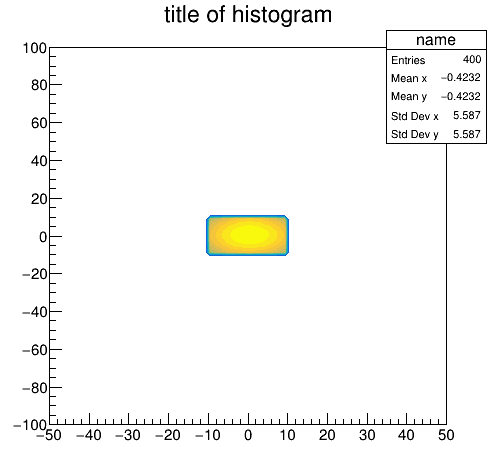

Info in <TCanvas::Print>: png file two_histogram_cont.png has been created


In [2]:
// plot the 2D histogram as countour lines
twoDimHistogram->Draw("CONT0");
canvas->SaveAs("two_histogram_cont.png");
canvas->Draw();

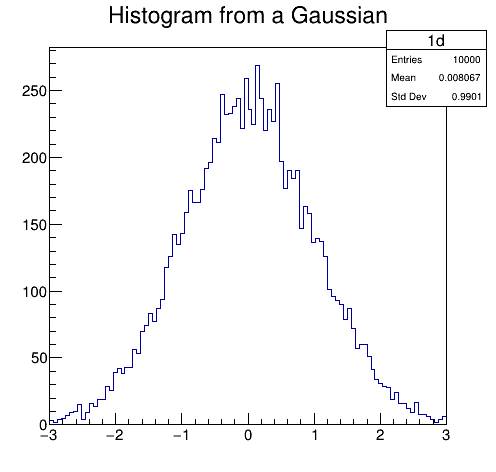

Info in <TCanvas::Print>: png file one_d_histogram.png has been created


In [3]:
// plot the 1D histogram
oneDimHist->Draw();
canvas->SaveAs("one_d_histogram.png");
canvas->Draw();

## 3. Creating a Histogram <a name="creating-histogram" />

There are multiple classes that may be used to create a histogram object in ROOT. The nomenclature for these objects is as follows: THNX, where N is the number of dimensions, and X is the data type being used to store the bin content (C for byte, S for short, I for integer, F for float, D for double). For example:

In [5]:
TH2S * histogram = new TH2S("name", "title of histogram", 100, -50.0, 50.0, 100.0, -100.0, 100.0);

Warning in <TROOT::Append>: Replacing existing TH1: name (Potential memory leak).


This creates a 2D histogram that has the name "name", a title of "title of histogram", 100 bins in the x and y directions, ranges from -50 to 50 in the x direction and from -100 to 100 in the y direction, and uses a short to store each bin content (up to 65,535 for each bin). This means in the x direction the bins have a width of 1 and in the y direction a width of 2.

### 3.1 Exercise: <a name="create-hist-exercise" />  
Create a 3D histogram that stores bin contents with a integer that covers the intervals $x \in [-1,1]$, $y \in [-50,50]$, and $z \in [30,80]$ with a bin width in the x direction of 0.001, y direction of 2, and z direction of 0.25. Note: $\in$ can be read roughly as "is a member of" or "lies in".

In [6]:
// Code goes here


The base class for all ROOT histograms is the [**TH1** class](https://root.cern.ch/doc/master/classTH1.html), which means two-dimensional and three-dimensional histograms are treated as extensions to a one-dimensional histogram. There are multiple constructors for one-dimensional, two-dimensional, and three-dimensional histograms. These vary from taking projections of higher dimensional histograms to obtain a lower dimensional histogram, defining variable bin widths, and cloning histograms, to name a few. We will not explictly be required to use any of these but feel free to read [here](https://root.cern.ch/root/htmldoc/guides/users-guide/Histograms.html#creating-histograms) for more information.

## 4. Filling Histograms <a name="filling-histograms" />

### 4.1 Fill Method <a name="fill-method" />
A histogram can be filled in different ways. The most common way of filling a histogram is using the `Fill()` method.
```c++
// one-dimensional
h1->Fill(x);
h1->Fill(x,w); // with weight
// two-dimensional
h2->Fill(x,y);
h2->Fill(x,y,w);
// three-dimensional
h3->Fill(x,y,z);
h3->Fill(x,y,z,w);
```
This fills the histogram by calculating what bin needs to be incremented by w or 1, if w is not given, for the given x, y, and z values. Every type of histogram can have positive and negative bin contents. Using the example from above:

In [11]:
for(int x = -10; x < 10; ++x) {
    for(int y = -10; y < 10; ++y) {
        twoDimHistogram->Fill(x, y, -pow(x, 2) - pow(y, 2) + 500);
    }
}

Here, this two-dimensional histogram is being filled from -10 to 10 in the x and y regions and is being filled according to the function $f(x,y) = -(x^2 + y^2) + 500$. 

### 4.2 Random Method <a name="random-method" />
#### 4.2.1 FillRandom()
The `FillRandom()` function can be used to randomly fill a histogram based on an existing `TF1` (the object used to represent a function) function or `TH1` histogram. From the example above:

In [20]:
TH1F * oneDimHistogram = new TH1F("1d", "Histogram from a Gaussian", 100, -3, 3);
oneDimHistogram->FillRandom("gaus", 10000);

Here `"gaus"` is a predefined `TF1` object within ROOT that is a Guassian distribution with a mean of 0 ($\mu = 0$) and a standard deviation of 1 ($\sigma = 1$): $$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{\frac{-\left(x-\mu\right)^2}{2\sigma^2}}$$
We randomly sampled this function 10,000 times and used these numbers to fill the histogram. 
#### 4.2.2 TF1.GetRandom()
The `GetRandom()` function evaluates the function at a random value and return the result of the evaluation. This can also be used to fill a histogram. Unlike `FillRandom()`, `GetRandom()` is a member function of the `TF1` class. This means the function needs to be defined in order to use `GetRandom()`. Using `GetRandom()` instead of `FillRandom()` as in the example above:

In [24]:
TF1 * gauss_func = new TF1("1d gauss", "gaus", -3, 3);
gauss_func->SetParameters(1, 0, 2);
TH1F * oneDimenHist = new TH1F("1d", "Histogram from a Gaussian", 100, -3, 3);
for(int i = 0; i < 10000; ++i) {
    double random_val = gauss_func->GetRandom();
    oneDimenHist->Fill(random_val);
}

Warning in <TROOT::Append>: Replacing existing TH1: 1d (Potential memory leak).


If you want to use `GetRandom()` to randomly fill from a 2D or 3D histogram, you need to use `GetRandom2()` or `GetRandom3()`, respectively. However, these functions require doubles as their argument and stores the random values generated from the distributions into these doubles. An example of using the `GetRandom3()` function is below.

```c++
  double randomValueX = 0.0;
  double randomValueY = 0.0;
  double randomValueZ = 0.0;
  myFunc->GetRandom3(random_value_x, random_value_y, random_value_z)
```

Determining the differences between these `FillRandom` and `GetRandom` methods will be part of your exercise.

### 4.3 Exercise:  <a name="fill-hist-exercise" />
Use the given `TF2` function object to randomly sample a two-dimensional histogram 10,000 times over the regions -5 to 5 with a bin count of 100 for both x and y. If using `GetRandom2()` use `ROOT.Double(var_name)` to pass your arguments as doubles. Next, use the histogram from the projected x-axis of the two-dimensional histogram to randomly sample a one-dimensional histogram over the region 0 to 5, 10,000 times with a bin count of 100. Then, use the supplied list to fill a one-dimensional histogram. 

Lastly, explore the differences between `GetRandom()` and `FillRandom()` for filling from a 1D guassian. What is the difference for low number of bins? High number of bins? High number of fills? Low number of fills?

In [ ]:
#include <vector>

TF2 * xyGaussian = new TF2("2d-gauss", "xygaus", -5, 5, -5, 5); 
xyGaussian->SetParameters(1, 0, 2, 0, 2); // amplitude, meanx,sigmax,meany,sigmay
vector<int> a_list{0, 0, 1, 4, 5, 6, 2, 1, 2, 1, 0 , 8, 9, 5, 7, 4, 6, 5, 7, 8, 2, 3, 1, 6, 7, 8, 2, 9, 2, 8, 1, 1, 0, 0, 2, 0, 0}

// Create and fill the 2-D histogram from the above TF2 object
histFromFunc = 

// The projected histogram from hist_from_func
TH1F h1 = histFromFunc->ProjectionX();
// Create and fill the 1-D histogram from h1 
histFromHist = 

// Create and fill the 1-D histogram from a_list
histFromList = 

## 5. Displaying Histograms <a name="display-histograms" />
### 5.1 TCanvas <a name="tcanvas" />
The `TCanvas` object is the object that represents a place to draw function and histograms, and anything else you can think of wanting to display on your computer's screen. It can be thought of in the literal sense as a canvas in which you can draw on. There is a lot of functionality within the `TCanvas` object that will not be covered here, but a link for a more in depth overview of `TCanvas` is [here](https://root.cern.ch/doc/master/classTCanvas.html).

To create a `TCanvas` object, we will follow the familiar prescription with `TH1` and `TF1` objects.
```c++
TCanvas * canvas = new TCanvas("name", "title", size_x, size_y);
```
where `size_x` and `size_y` are integers representing the x and y dimensions of the canvas in pixels.

### 5.2 Draw() <a name="draw" />
The `Draw()` method in `TH1` can be used to paint the histogram onto a canvas. This will overwrite anything that was previously painted on the canvas. There are ways in which you can segment a canvas into multiple **Pads** if you want to paint multiple items to a single canvas. We will not cover this since it is not necessary for our purposes, although this isn't incredibly difficult to do. If we have a `TH1` histogram called `h1`, then to paint this histogram onto the `TCanvas` named `canvas` we would type:

```c++
h1->Draw();
```

Note we did not refence `canvas` anywhere. This is because `Draw()` will simply paint onto the `TCanvas` that was last created and the canvas updates automatically. However, this does not work in the *Jupyter Notebook* environment. Therefore, you need to tell the `TCanvas` to update as well.

```c++
canvas->Draw();
```

The `Draw()` method can have options passed as arguments to change how the histogram will be painted. We will not cover these as there are tons of them but a full listing can be seen [here](https://root.cern.ch/root/htmldoc/guides/users-guide/Histograms.html#drawing-histograms). 

To save this painting so that we can look at it later, we use the `SaveAs()` method in `TCanvas` (inherited from `TPad`). A full list of the file formats that are accepted is:
* if filename is "", the file produced is padname.ps
* if filename starts with a dot, the padname is added in front
* if filename contains .eps, an Encapsulated Postscript file is produced
* if filename contains .pdf, a PDF file is produced
* if filename contains .svg, a SVG file is produced
* if filename contains .tex, a TeX file is produced
* if filename contains .gif, a GIF file is produced
* if filename contains .gif+NN, an animated GIF file is produced See comments in TASImage::WriteImage for meaning of NN and other .gif sufix variants
* if filename contains .xpm, a XPM file is produced
* if filename contains .png, a PNG file is produced
* if filename contains .jpg, a JPEG file is produced NOTE: JPEG's lossy compression will make all sharp edges fuzzy.
* if filename contains .tiff, a TIFF file is produced
* if filename contains .C or .cxx, a C++ macro file is produced
* if filename contains .root, a Root file is produced
* if filename contains .xml, a XML file is produced

To save our painting of `h1`, we could do:
```c++
canvas->SaveAs("h1.png");
```

### 5.3 Exercise:  <a name="draw-hist-exercise" />
Draw the three histograms created in [3.3](#fill-hist-exercise) and h1. Hint: Use option "SURF2" as in the opening example for 2D histograms